# 数据可视化

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # 统计数据可视化
# 绘图风格： style= ["darkgrid"，"whitegrid"，"dark"，"white"，"ticks"]，默认darkgrid
sns.set_style(style="darkgrid")
# 颜色风格： themes = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']
sns.set_palette(palette='bright')
ChinaFonts = {"黑体": "simhei", "宋体": "simsun", "华文楷体": "STKAITI"}
plt.rcParams["font.sans-serif"] = ChinaFonts["黑体"]  # 解决中文乱码问题
plt.rcParams["axes.unicode_minus"] = False  # 解决负号无法正常显示的问题
path_data = "/home/carton/workspace/python/Multivariate-statistical-analysis/database/第二章数据/"  # 设置 数据路径
path_pic = "/home/carton/workspace/python/Multivariate-statistical-analysis/save-database/第二章数据/"  # 设置 图像保存路径

## 交互式调色板

In [2]:
sns.choose_colorbrewer_palette("sequential") # 可选参数 {‘sequential’, ‘diverging’, ‘qualitative’}

NameError: name 'FloatSlider' is not defined

<AxesSubplot: >

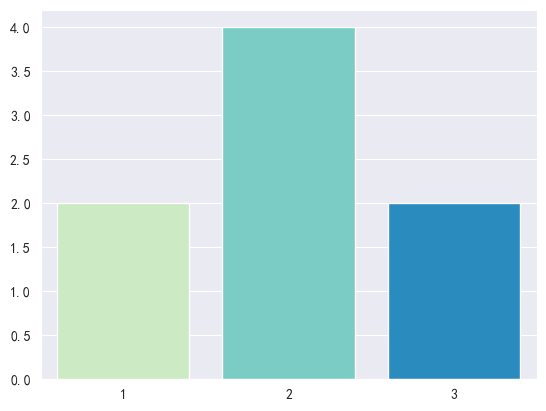

In [3]:
# 调用调色板
c_p = sns.color_palette("GnBu", n_colors=3, desat=1)
sns.barplot(x=[1,2,3], y=[2,4,2],palette=c_p, saturation=1)

## 读入数据 
分析数据特点：包含中文、股票代码存在"0"开头

In [4]:
sector_file = path_data + "行业板块.txt" # 板块分析结果文件名，含路径
df_SectorCode = pd.read_csv(sector_file, encoding="gbk", sep=",", dtype=str,names=["板块代码", "板块名称", "股票代码", "股票名称"])
df_SectorCode

,板块代码,板块名称,股票代码,股票名称
0,880301,煤炭,000552,靖远煤电
1,880301,煤炭,000571,ST大洲
2,880301,煤炭,000723,美锦能源
3,880301,煤炭,000937,冀中能源
4,880301,煤炭,000983,山西焦煤
...,...,...,...,...
4996,880497,综合类,600730,中国高科
4997,880497,综合类,600770,综艺股份
4998,880497,综合类,600784,鲁银投资
4999,880497,综合类,600805,悦达投资


In [5]:
regional_file = path_data + "地区板块.txt" # 板块分析结果文件名，含路径
df_regionalCode = pd.read_csv(regional_file, encoding="gbk", sep="\t", dtype=str,names=["板块代码", "板块名称", "股票代码", "股票名称"])
df_regionalCode

,板块代码,板块名称,股票代码,股票名称
0,880201,黑龙江,000587,*ST金洲
1,880201,黑龙江,000711,京蓝科技
2,880201,黑龙江,000901,航天科技
3,880201,黑龙江,000922,佳电股份
4,880201,黑龙江,000985,大庆华科
...,...,...,...,...
4984,880232,内蒙板块,600967,内蒙一机
4985,880232,内蒙板块,600988,赤峰黄金
4986,880232,内蒙板块,601216,君正集团
4987,880232,内蒙板块,603230,内蒙新华


In [7]:
file_Iris = path_data +"安德森鸢尾花卉数据集.xls"
df_Iris = pd.read_excel(file_Iris )
df_Iris["属种"] = df_Iris["属种"].astype("category")
# astype( )将变量"属种"设置为 category类型，类似 R 的 factor 变量
df_Iris

,花萼长度,花萼宽度,花瓣长度,花瓣宽度,属种
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
file_GDP = path_data + "中国GDP季度数据.xls"
df_GDP = pd.read_excel(file_GDP, skiprows=2, header=0, nrows = 1, index_col=0)
df_GDP = df_GDP.T
df_GDP.columns=["GDP当季值(亿元)"] # 重设变量名
IND_str = df_GDP.index # 后续处理索引，以便绘图展示
IND_str = [item[0:4]+item[6] for item in IND_str ] # 内容简化
df_GDP = df_GDP.set_index(pd.Series(IND_str)) # 重置索引
df_GDP = df_GDP.sort_index() # 索引排序
df_GDP

,GDP当季值(亿元)
1992一,5262.8
1992三,7192.6
1992二,6484.3
1992四,8254.8
1993一,6834.6
...,...
2021三,289919.3
2021二,281528.0
2021四,324237.4
2022一,270177.8


## 绘制饼图

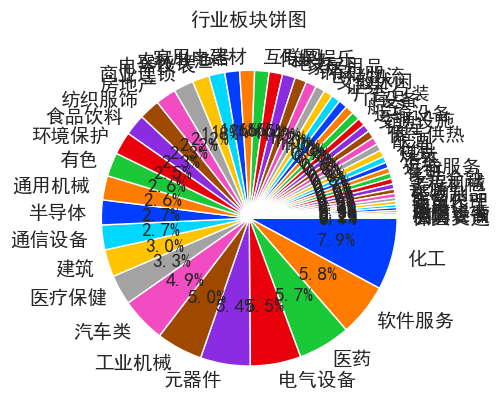

In [9]:
df_SectorCode['板块名称'].value_counts().plot(kind="pie", autopct='%1.1f%%', 
counterclock=False, shadow=False, fontsize=14)
plt.title('行业板块饼图', fontsize=14)
plt.ylabel('') # 不显示 y 轴标签，避免覆盖
plt.show()

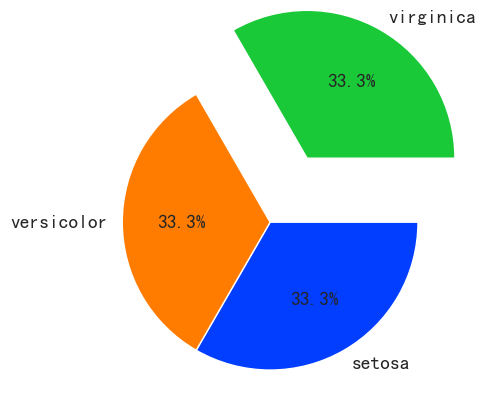

In [10]:
df_Iris['属种'].value_counts().plot(kind="pie", autopct='%1.1f%%', counterclock=False, shadow=False, fontsize=14, explode=[0,0,0.5])
plt.ylabel('') # 不显示 y 轴标签，避免覆盖
plt.show()

## 绘制条形图
plt.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, \**kwargs)

x：横轴坐标； height： 纵轴坐标，条形高度； width：条形宽度，默认0.8；

bottom：条形底部baseline，默认0；

align：条形中心，{'center', 'edge'} 居中或靠左；

其他参数：

color：条形填充色； edgecolor：条形边框颜色； linewidth：条形边框宽度；

tick_label：下标的标签； log：纵轴用对数坐标系；

xerr、 yerr：在条形上添加误差线； ecolor：误差线的颜色(errorbar color)；

orientation：图是竖直("vertical")还是水平("horizontal")，默认竖直

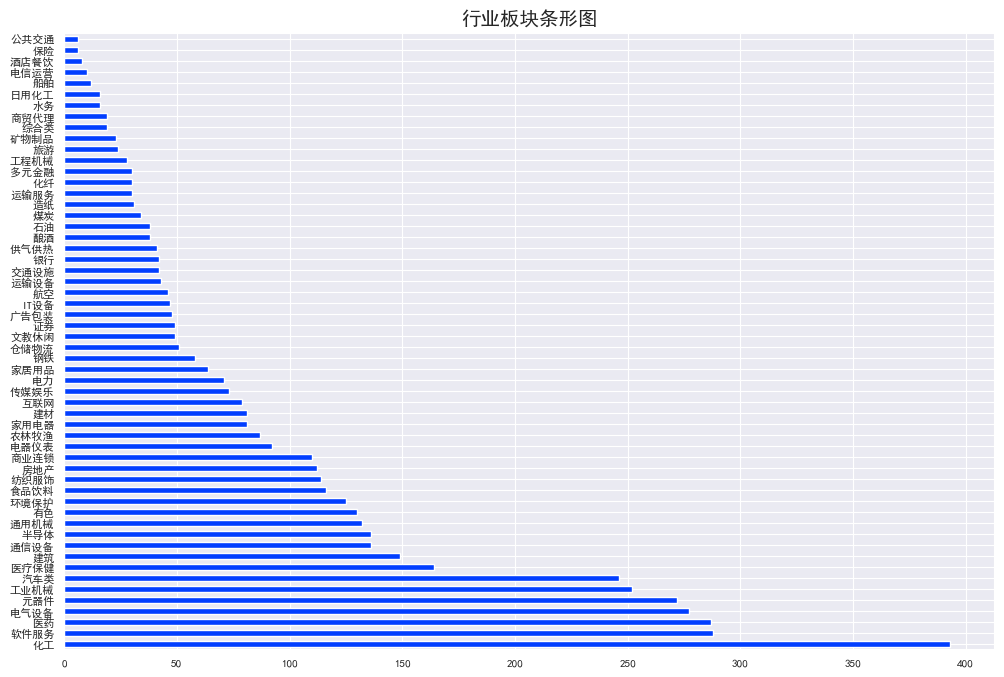

In [11]:
df_SectorCode['板块名称'].value_counts().plot(kind="barh", fontsize=8, figsize=(12,8))
plt.title('行业板块条形图', fontsize=14)
plt.show()

<AxesSubplot: >

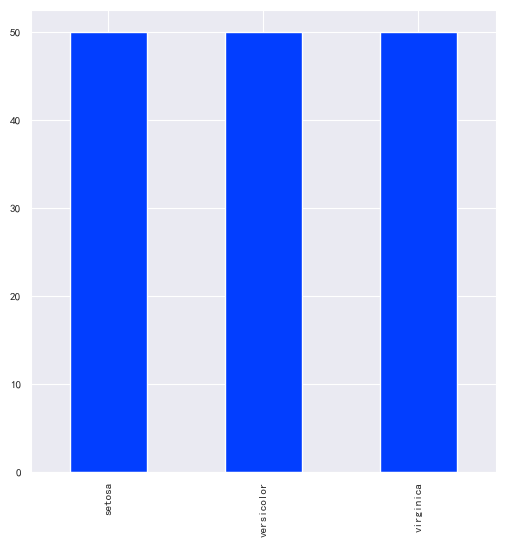

In [12]:
df_Iris['属种'].value_counts().plot(kind="bar", fontsize=8, figsize=(6,6)) # 竖状的

<AxesSubplot: >

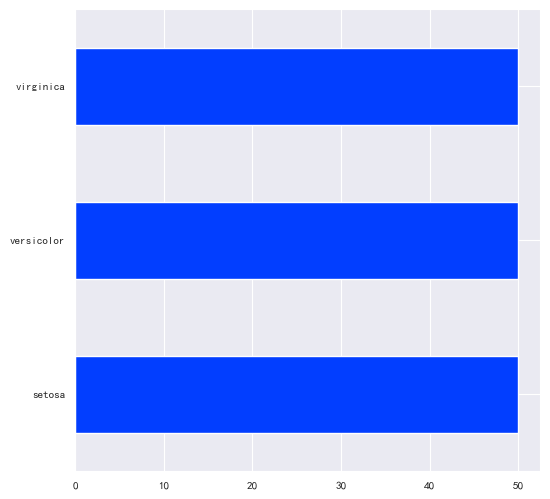

In [13]:
df_Iris['属种'].value_counts().plot(kind="barh", fontsize=8, figsize=(6,6)) # 横状

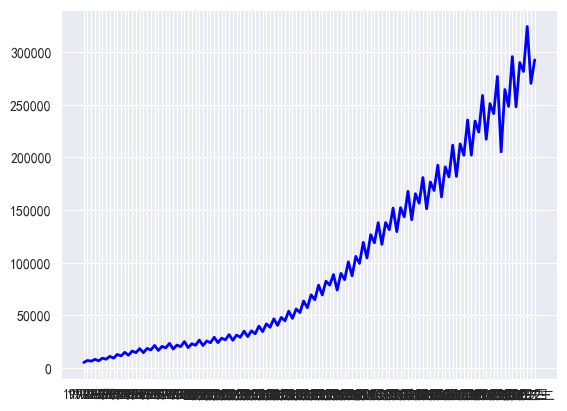

In [14]:
plt.plot(df_GDP["GDP当季值(亿元)"], color='b', lw=2) # 直接plt.plot绘制
plt.show()

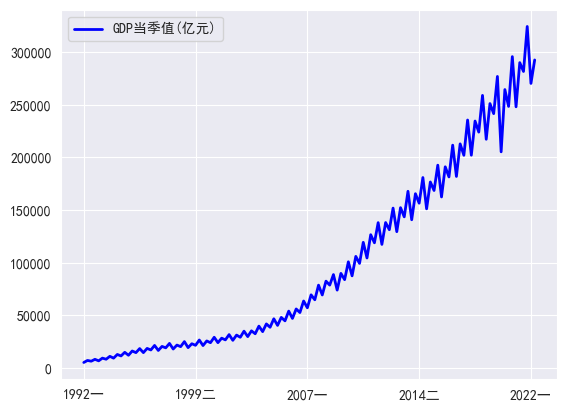

In [15]:
plt.plot(df_GDP, color='b', lw=2, label=df_GDP.columns[0]) # label为图例
ax=plt.gca() # plt.gcf()和plt.gca()，分别表示获取当前图像和获取当前轴
ax.xaxis.set_major_locator(plt.MultipleLocator(30)) # X轴方向刻度每20个绘制一次
plt.legend()
plt.show()

## 散点图
import seaborn as sns # 统计数据可视化
sns.relplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, 
units=None, row=None, col=None, palette=None, sizes=None, size_norm=None, 
markers=None, legend='auto', kind='scatter', height=5, \**kwargs)

➢ data：引用的数据集； x, y：x轴和y轴对应的变量；

➢ hue：分组变量，生成不同颜色的点以区分类别； palette：对应hue的色彩模板；

➢ style：分组变量，生成不同样式的点； markers：对应style的散点形状；

➢ size：分组变量，生成不同大小的点； row, col：将变量绘制在(row, col)幅子图中

➢ kind：默认kind="scatter"等价 sns.scatterplot()，选项kind="line"等价sns.lineplot()

➢ height：图片高度

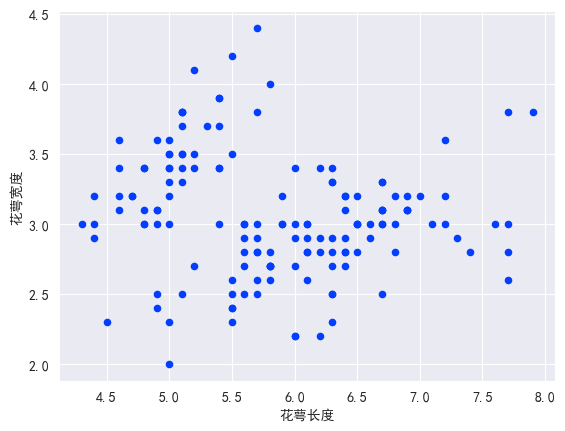

In [16]:
df_Iris.plot(kind="scatter",x='花萼长度',y='花萼宽度')
plt.show()

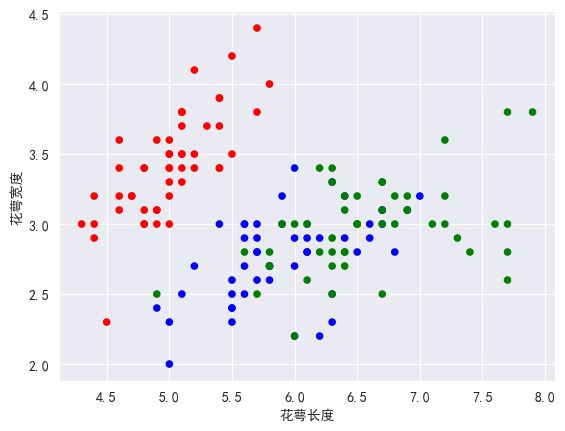

In [17]:
color_dict = {'setosa' : "red", 'versicolor': "blue", 'virginica' : "green"}
color_list = [ color_dict[item] for item in df_Iris['属种']] # 通过字典将类别转为颜色
df_Iris.plot(kind="scatter",x='花萼长度',y='花萼宽度', color=color_list)
plt.show()

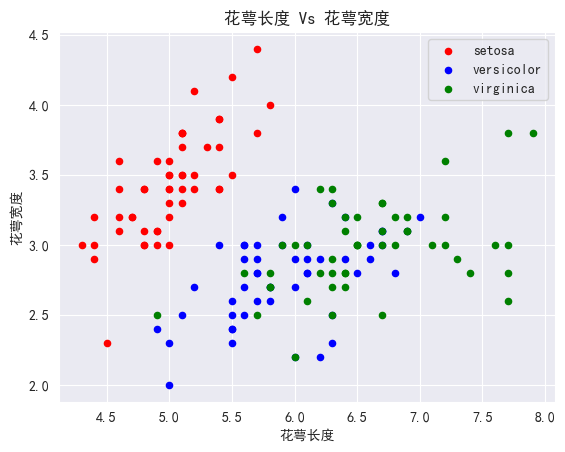

In [18]:
group_Iris = sorted(list(set(df_Iris['属种']))) # set提取种类，转换为列表并排序
col_list = ["red", "blue", "green"] # 设置对应颜色
fig, ax = plt.subplots() # 设置画布和坐标轴，只有1幅图可不设参数
for i in range(len(group_Iris)):
    df_Iris[df_Iris.属种 == group_Iris[i]].plot(kind='scatter', x='花萼长度', y='花萼宽度', color=col_list[i], label=group_Iris[i], title='花萼长度 Vs 花萼宽度', ax=ax)
plt.show()

<AxesSubplot: >

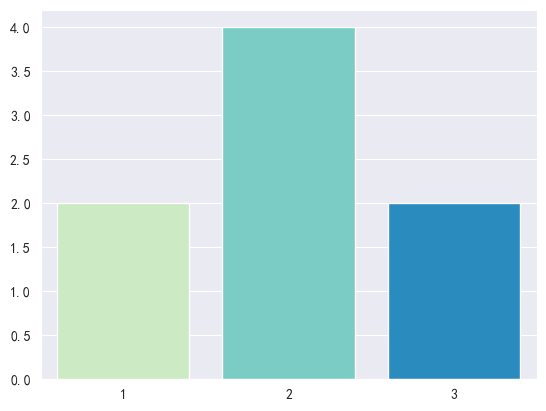

In [19]:
# 调用调色板
c_p = sns.color_palette("GnBu", n_colors=3, desat=1)
sns.barplot(x=[1,2,3], y=[2,4,2],palette=c_p, saturation=1)

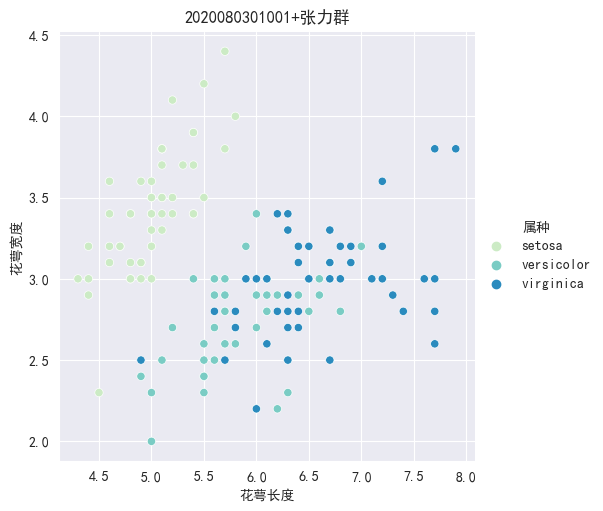

In [20]:
sns.relplot( data=df_Iris, x='花萼长度', y='花萼宽度', hue="属种", palette=c_p) # 不设置 palette 则系统自动配色
plt.title("2020080301001+张力群")
plt.show()

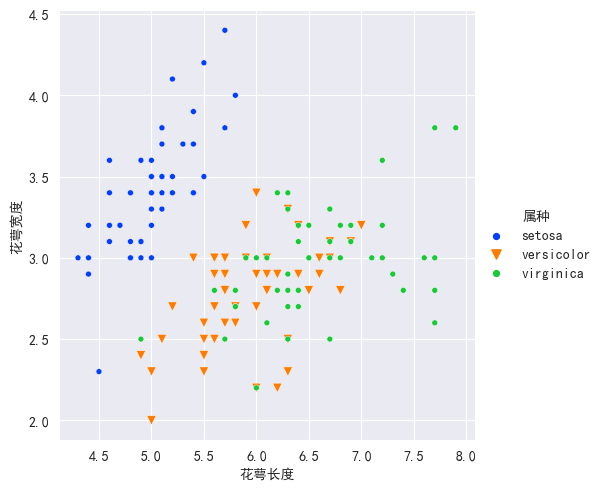

In [21]:
marker_dict = {'setosa' : '.', 'versicolor': 'v', 'virginica' : 'o'} 
sns.relplot(data=df_Iris, x='花萼长度', y='花萼宽度', style="属种", markers=marker_dict, hue="属种", size="属种")
plt.show()

## 直方图 + 密度图
➢ data：引用的数据集； x, y：x轴和y轴对应的变量； fill ：取False则为虚框；

➢ hue：分组变量，生成不同颜色的点以区分类别； palette：对应hue的色彩模板；

➢ bins：分块(bin)数目；binwidth：分块宽度； shrink：每个框相对binwidth的宽度；

➢ kde：若为True，则计算平滑的核密度估计； kde_kws：控制 KDE 计算的参数；

➢ multiple：多指标图形，可选项{"layer", "dodge", "stack", "fill"}；

➢ element：{“bars”, “step”, “poly”}，对应 条形图、阶梯图、多边形

<AxesSubplot: xlabel='花瓣长度', ylabel='Count'>

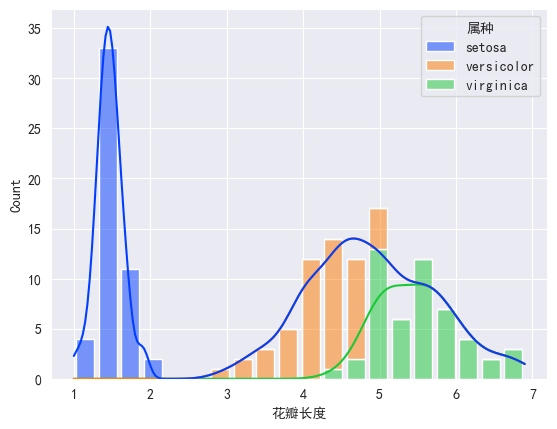

In [22]:
sns.histplot(data=df_Iris,x="花瓣长度", hue="属种", bins=20, kde=True,multiple="stack", palette="bright", shrink=.8) # shrink设置条形宽度为原来的0.8

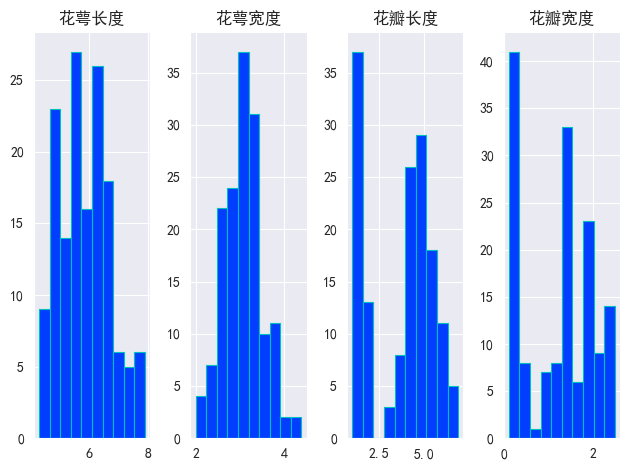

In [23]:
df_Iris.hist(edgecolor='c', linewidth=0.8, layout=(1,4))
plt.tight_layout() 
plt.show()

## 箱线图 + 小提琴图

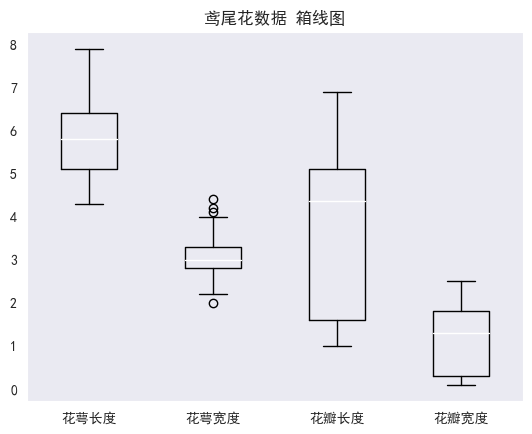

In [24]:
df_Iris.boxplot(grid=False)
plt.title("鸢尾花数据 箱线图")
plt.show()

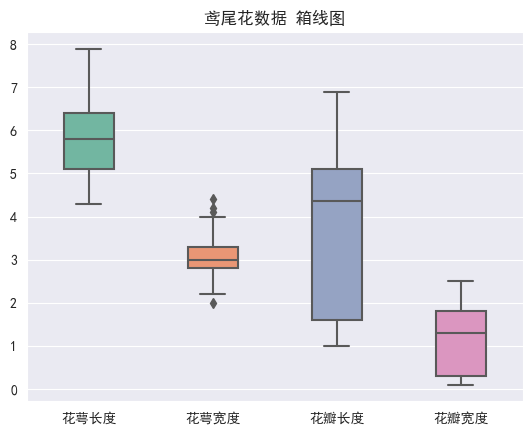

In [25]:
sns.boxplot(data=df_Iris, width=0.4, 
palette="Set2" )
plt.title("鸢尾花数据 箱线图")
plt.show()

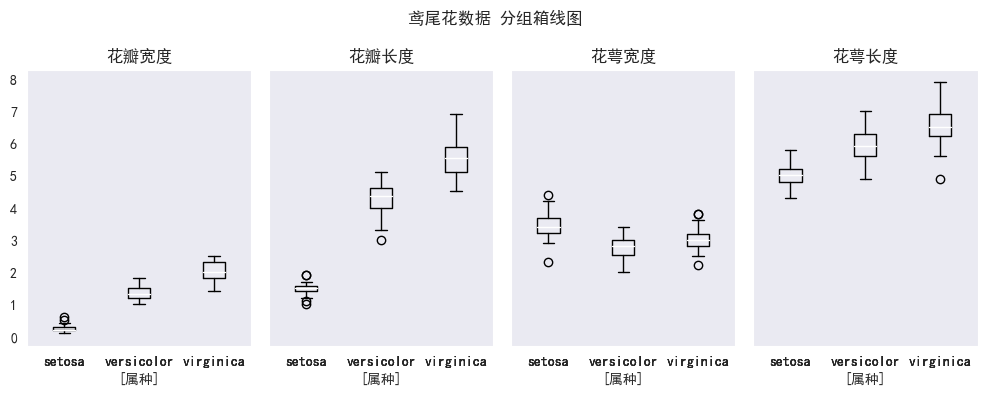

In [26]:
df_Iris.boxplot(by="属种",layout=(1, 4),grid=False, figsize=(10,4))
plt.suptitle("鸢尾花数据 分组箱线图")
plt.tight_layout() # 避免标题与刻度 重叠
plt.show()

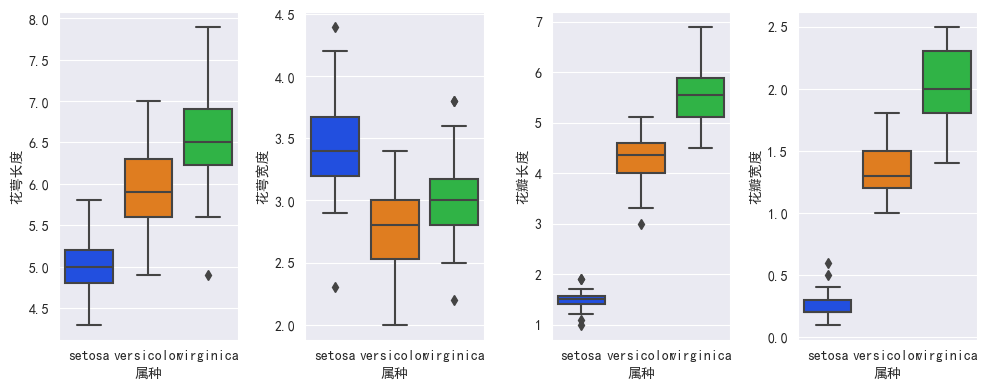

In [27]:
col_list = ['花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度']
fig,axes = plt.subplots(ncols=4, figsize=(10,4))
for i in range(len(col_list)):
    sns.boxplot(x='属种',y=col_list[i],data=df_Iris, ax=axes[i])
plt.tight_layout() # 避免标题与刻度 重叠
plt.show()

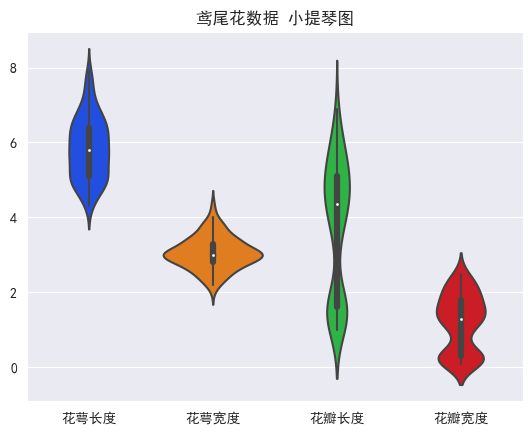

In [28]:
my_pal = {'花萼长度':"red", '花萼宽度':"pink", '花瓣长度':"blue", '花瓣宽度':"cyan"}
sns.violinplot(data=df_Iris, orient="v", palette="bright")
plt.title("鸢尾花数据 小提琴图")
plt.show()

## 蜂巢图 + 小提琴图

/opt/anaconda/envs/data-science/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda/envs/data-science/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


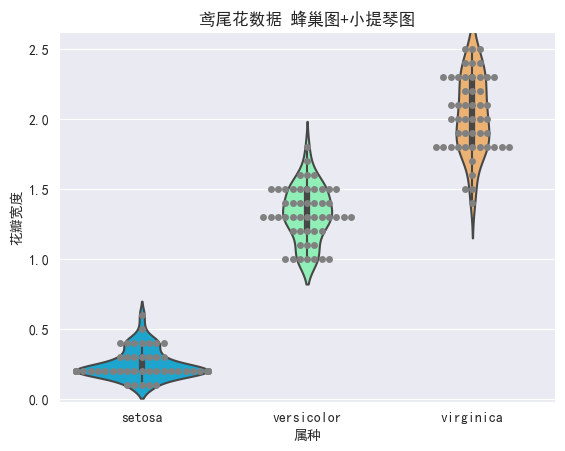

In [29]:
sns.violinplot(x="属种", y="花瓣宽度", data=df_Iris, palette="rainbow")
sns.swarmplot(x="属种", y="花瓣宽度", data=df_Iris, color="0.5")
plt.title("鸢尾花数据 蜂巢图+小提琴图")
plt.show()

##  矩阵图
sns.pairplot(data, hue=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False) 

➢ data：数据集； hue：分组变量； palette：对应hue的色彩模板；

➢ vars：待分析变量列表，若不指定则为所有数值型变量；

➢ {x, y}_vars：指定行列变量，可能不再是方阵图形；

➢ kind：{‘scatter’, ‘kde’, ‘hist’, ‘reg’}，绘制的图形样式；

➢ diag_kind：{‘auto’, ‘hist’, ‘kde’, None}，对角线图形样式； markers：点型；

➢ height、aspect：每个面的高度、宽度(英寸)；corner：若为True则为下三角图形。

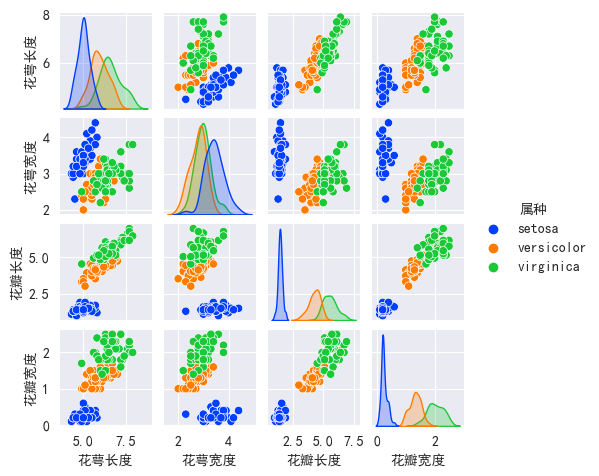

In [30]:
fig = sns.pairplot(df_Iris, height=1.2, hue="属种")

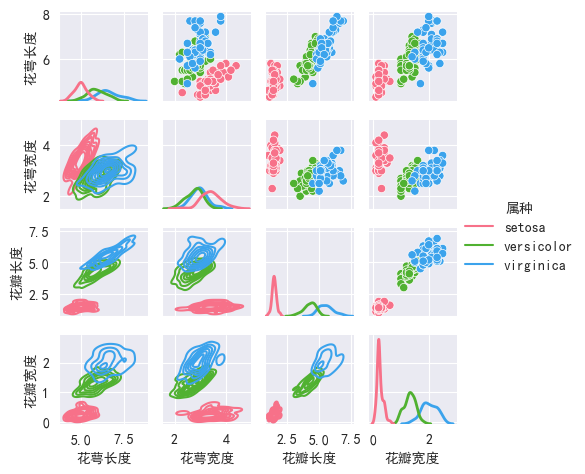

In [31]:
g = sns.PairGrid(df_Iris,hue="属种",height=1.2,
palette="husl")
g.map_diag(sns.kdeplot, lw=2) #设置对角线图表
g.map_upper(sns.scatterplot) #设置右上角图表
g.map_lower(sns.kdeplot) #设置左下角图表
g.add_legend() # 添加图例